In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

training_data = pd.read_csv("training-part-2.csv")
test_data = pd.read_csv("test-part-2.csv")
test_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile


In [3]:
X_train = training_data.iloc[:, 0:17].values
y_train = training_data.iloc[:, 17].values

X_test = test_data.iloc[:, 0:17].values
y_test = test_data.iloc[:, 17].values

<AxesSubplot:xlabel='Class', ylabel='Count'>

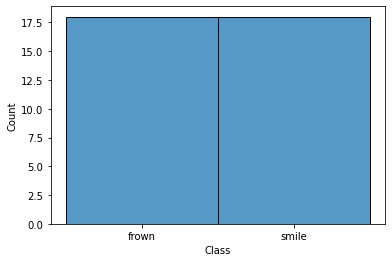

In [4]:
seaborn.histplot(data=training_data, x="Class")

In [7]:
from gda import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
test_data["Result"] = model.predict(X_test).tolist()
test_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,0
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,0
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,0
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


In [8]:
from gda import GaussianDiscriminantAnalysis

gda = GaussianDiscriminantAnalysis()
gda.fit(X_train, y_train)
predicted_data = test_data.copy()
predicted_data["Result"] = gda.predict(X_test).tolist()
predicted_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,frown
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,frown
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,smile
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


<AxesSubplot:xlabel='Result', ylabel='Count'>

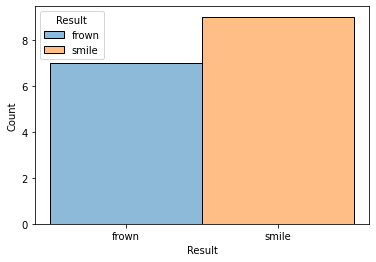

In [21]:
seaborn.histplot(data=predicted_data, x="Result", hue="Result")

In [10]:
from gda import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted_data = test_data.copy()
predicted_data["Result"] = gnb.predict(X_test).tolist()
predicted_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,frown
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,smile
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,frown
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


<AxesSubplot:xlabel='Result', ylabel='Count'>

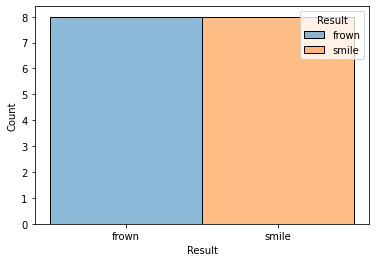

In [11]:
seaborn.histplot(data=predicted_data, x="Result", hue="Result")